<a href="https://colab.research.google.com/github/civcell/MathDataC/blob/main/Predictive_Ancestry_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
%%capture
!apt-get install poppler-utils
!pip install pdf2image
!pip install requests
!pip install scikit-image
!pip install matplotlib


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from pdf2image import convert_from_path
import requests
import os
import cv2

# Function to plot images
def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap='gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

# Function to construct the export PDF URL from a Google Slide URL
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    return url_head + url_body + "/export/pdf?format=pdf" # Changed this line to construct the correct URL

# Function to download Google Slides as a PDF and convert it into images
def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)  # Higher DPI for better quality images
    return images

# Example Google Slides URL
google_slide_url = "https://docs.google.com/presentation/d/1CW8NEuaryZFTwleSUn3lvugWPcIbeJ57Prruk9OnVoo/edit?usp=sharing"

# Get the slides as images
slides_images = get_slides(google_slide_url)

# Create a directory to save the images
image_dir = './slides_images/'
os.makedirs(image_dir, exist_ok=True)

# Save each slide image
for i, slide in enumerate(slides_images):
    image_path = os.path.join(image_dir, f'slide_{i+1}.jpg')
    slide.save(image_path, 'JPEG')

print(f"Extracted {len(slides_images)} images from the slide deck")


Extracted 12 images from the slide deck


In [15]:
# Function to preprocess the extracted images
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = image / 255.0  # Normalize pixel values
    return image

# Load all images and their corresponding labels
images = []
labels = []

# Assign labels based on filenames (modify based on your naming convention)
for filename in os.listdir(image_dir):
    if filename.endswith(".jpg"):
        image = load_and_preprocess_image(os.path.join(image_dir, filename))
        images.append(image)
        # Example: Assign labels (0 for any image) - This will assign the label 0 to all images.
        labels.append(0)

images = np.array(images)
labels = np.array(labels)

# Print the number of images and labels to check if they match
print(f"Number of images: {len(images)}")
print(f"Number of labels: {len(labels)}")

Number of images: 12
Number of labels: 12


In [16]:
# CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(images, labels, epochs=10, validation_split=0.2)

# Save the trained model
model.save("model.h5")

# Convert the model to TensorFlow.js format
!tensorflowjs_converter --input_format keras model.h5 /content/tfjs_model


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2222 - loss: 0.6975 - val_accuracy: 1.0000 - val_loss: 0.0193
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 737ms/step - accuracy: 1.0000 - loss: 0.0174 - val_accuracy: 1.0000 - val_loss: 4.5082e-05
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 1.0000 - loss: 3.8450e-05 - val_accuracy: 1.0000 - val_loss: 3.2350e-08
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step - accuracy: 1.0000 - loss: 3.2917e-08 - val_accuracy: 1.0000 - val_loss: 1.0368e-11
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step - accuracy: 1.0000 - loss: 1.6469e-11 - val_accuracy: 1.0000 - val_loss: 1.8240e-15
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step - accuracy: 1.0000 - loss: 5.3520e-15 - val_accuracy: 1.0000 - val_loss: 2.1462e-19
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step - accuracy: 1.0000 - loss: 1.2812e-18 - val_accuracy: 1.0000 - val_loss: 2.0936e-23
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step - accuracy: 1.0000 - loss: 2.6825e-22 

/bin/bash: line 1: tensorflowjs_converter: command not found


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.6250 - val_accuracy: 1.0000 - val_loss: 1.6527e-04
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step - accuracy: 1.0000 - loss: 1.6505e-04 - val_accuracy: 1.0000 - val_loss: 3.2453e-08
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 940ms/step - accuracy: 1.0000 - loss: 4.5708e-08 - val_accuracy: 1.0000 - val_loss: 3.6328e-12
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step - accuracy: 1.0000 - loss: 9.7140e-12 - val_accuracy: 1.0000 - val_loss: 2.9236e-16
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 1.7196e-15 - val_accuracy: 1.0000 - val_loss: 1.9100e-20
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 863ms/step - accuracy: 1.0000 - loss: 2.6612e-19 - val_accuracy: 1.0000 - val_loss: 1.1494e-24
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 3.9904e-23 - val_accuracy: 1.0000 - val_loss: 7.4224e-29
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 6

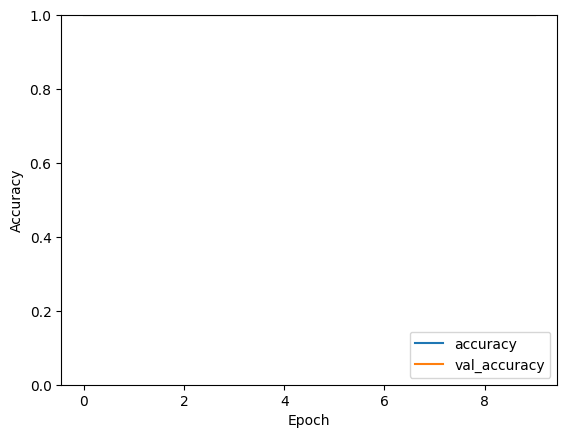

In [19]:
from tensorflow.keras import layers, models

# Create a CNN model for image classification
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(images, labels, epochs=10, validation_split=0.2)

# Plot training history (optional, to visualize training performance)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 1.0029e-37 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 967ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step - accuracy: 1.0

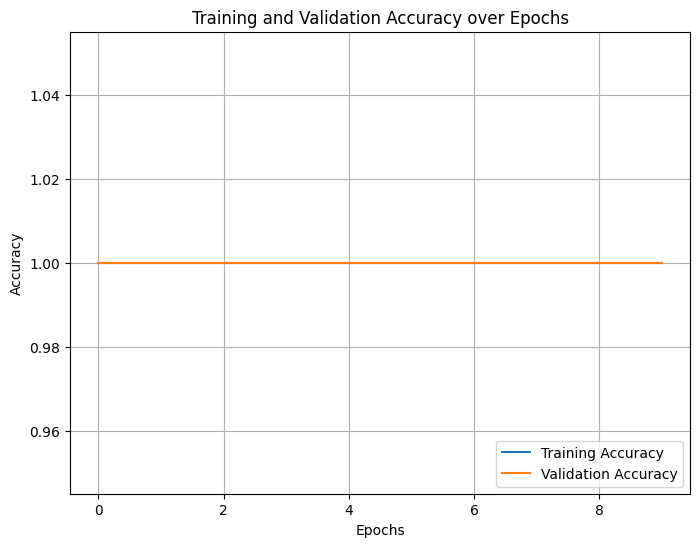

In [24]:
import matplotlib.pyplot as plt

# Ensure inline plotting
%matplotlib inline

# Train the model
history = model.fit(images, labels, epochs=10, validation_split=0.2)

# Plot training history
plt.figure(figsize=(8, 6))  # Set figure size to ensure the plot is visible
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [25]:
print(history.history.keys())  # Check the available metrics in the history object


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [26]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [18]:
# Save the model in Keras .h5 format
model.save("ancestry_model.h5")

print("Model saved successfully!")



Model saved successfully!


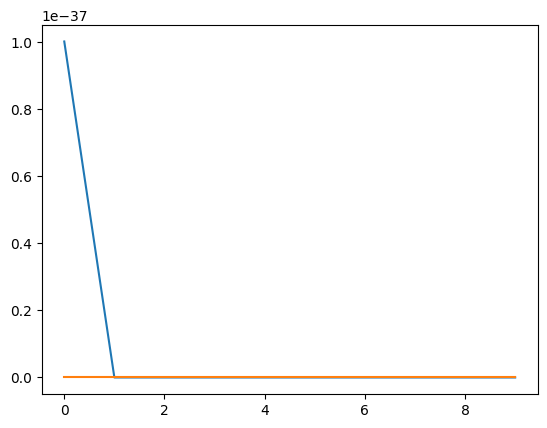

In [27]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')


In [20]:
!pip install tensorflowjs


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 68.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


In [21]:
# Convert the model to TensorFlow.js format
!tensorflowjs_converter --input_format keras ancestry_model.h5 /content/tfjs_model

print("Model converted to TensorFlow.js format!")


2024-09-10 22:49:15.327857: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 22:49:15.399329: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-10 22:49:15.453381: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-10 22:49:18.718572: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
failed to lookup keras version from the file,
    this is likely a weight only file
Model converted to TensorFlow.js format!


In [23]:
<!DOCTYPE html>
<html>
<head>
    <meta charset="utf-8">
    <script src="https://cdn.jsdelivr.net/npm/@tensorflow/tfjs"></script>
    <script src="https://cdn.jsdelivr.net/npm/tensorspace"></script>
</head>
<body>
    <div id="network" style="width: 800px; height: 600px;"></div>

    <script>
        // Load the TensorFlow.js model into TensorSpace.js
        let model = new TSP.models.Sequential("path_to_your_model/model.json");

        // Initialize the TensorSpace.js 3D visualization
        model.init(function () {
            model.openLayers();
        });

        // Load the model file
        model.load("path_to_your_model/model.json");
    </script>
</body>
</html>


SyntaxError: invalid decimal literal (<ipython-input-23-bcdaf00ea816>, line 15)